<a href="https://colab.research.google.com/github/dcrp1234/Machine-Learning/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:15<00:00, 108MB/s] 
100% 1.06G/1.06G [00:15<00:00, 73.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size =(3,3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer = 'adam', loss ="binary_crossentropy", metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs =10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 110ms/step - loss: 0.6124 - accuracy: 0.6661 - val_loss: 0.5347 - val_accuracy: 0.7270
Epoch 2/10
625/625 [==============================] - 82s 130ms/step - loss: 0.4914 - accuracy: 0.7625 - val_loss: 0.4841 - val_accuracy: 0.7692
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3849 - accuracy: 0.8256 - val_loss: 0.4990 - val_accuracy: 0.7906
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2579 - accuracy: 0.8901 - val_loss: 0.6404 - val_accuracy: 0.7768
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1535 - accuracy: 0.9383 - val_loss: 1.0099 - val_accuracy: 0.7702
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0956 - accuracy: 0.9655 - val_loss: 1.0864 - val_accuracy: 0.7508
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0644 - accuracy: 0.9773 - val_loss: 1.0114 - val_accurac

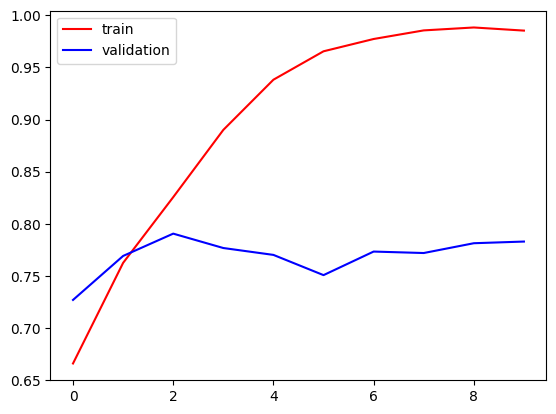

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color="blue", label = 'validation')
plt.legend()
plt.show()

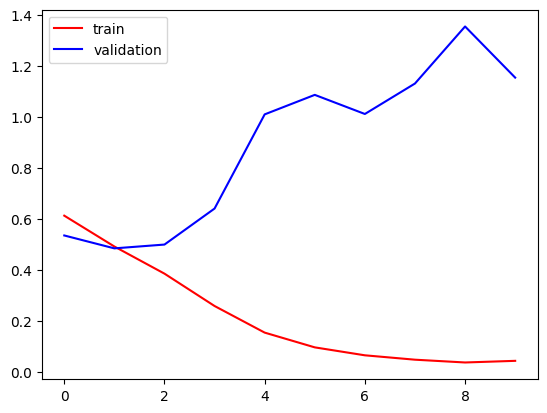

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color="blue", label = 'validation')
plt.legend()
plt.show()

In [ ]:
#Graphs show overfitting

In [ ]:
#Batch Normalization and DropOut
#Create CNN model to correct overfitting

model1 = Sequential()

model1.add(Conv2D(32, kernel_size =(3,3), padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model1.add(Conv2D(64, kernel_size =(3,3), padding='valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model1.add(Conv2D(128, kernel_size =(3,3), padding='valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))

model1.add(Flatten())

model1.add(Dense(128, activation ="relu"))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation ="relu"))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation ="sigmoid"))

In [ ]:
model.summary()
model.compile(optimizer = 'adam', loss ="binary_crossentropy", metrics = ['accuracy'])
history = model.fit(train_ds, epochs =10, validation_data=validation_ds)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

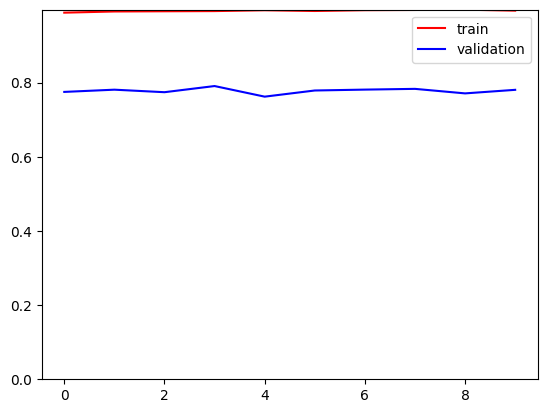

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color="blue", label = 'validation')
plt.legend()
plt.ylim(0, max(max(history.history['accuracy']), max(history.history['val_accuracy'])))  # Adjust ylim to start from 0
plt.show()

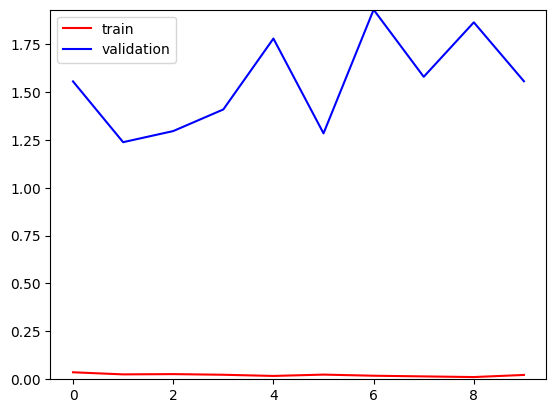

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color="blue", label = 'validation')
plt.legend()
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))  # Adjust ylim to start from 0
plt.show()

Verifying Accuracy with new images for cats and dogs